* MNIST with Convoluted NN Keras
* Train set is made of Kaggle 42k + Keras 60k = 102k
* CV on train and then test on 10k from Keras
* Final model is trained on train+test = 112k
* CNN with adam ( vs rmsprop) and dropout against overfitting

* It's a quick intro to the capabilities of CNN and Keras

# Importing Dataset form kaggle

In [0]:
# Colab library to upload files to notebook
from google.colab import files
# Install Kaggle library
!pip install -q kaggle



import os
user = 'nateshreddy'
key = 'da0bcdffa3cc7217c967c2dcd0383f84'

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json




!kaggle competitions download -c digit-recognizer




!unzip \*.zip

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                

2 archives were successfully processed.


# Importing the necessary Modules

In [0]:
# IMPORT modules
# TURN ON the GPU !!!
# If importing dataset from outside - like the Keras dataset - Internet must be "connected"

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical

from keras.datasets import mnist

print(os.getcwd())
print("Modules imported \n")
print("Files in current directory:")
from subprocess import check_output
print(check_output(["ls", "../content"]).decode("utf8")) #check the files available in the directory

/content
Modules imported 

Files in current directory:
sample_data
sample_submission.csv
test.csv
test.csv.zip
test.ipynb
train.csv
train.csv.zip



# Reading the data 

In [0]:
train_ini = pd.read_csv('../content/train.csv')
test_ini = pd.read_csv('../content/test.csv')

In [0]:
train = train_ini.copy()
test_imagesKaggle = test_ini.copy()
train_labelsKaggle = train_ini['label']

print("train with Labels  ", train.shape)
print("train_labelsKaggle ", train_labelsKaggle.shape)
print("_"*50)
train.drop(['label'],axis=1, inplace=True) #dropping label
train_imagesKaggle = train
print("train_imagesKaggle without Labels ", train_imagesKaggle.shape)
print("_"*50)
print("test_imagesKaggle  ", test_imagesKaggle.shape)

train with Labels   (42000, 785)
train_labelsKaggle  (42000,)
__________________________________________________
train_imagesKaggle without Labels  (42000, 784)
__________________________________________________
test_imagesKaggle   (28000, 784)


# Reshaping Images

train image
2


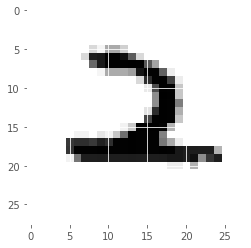

test image


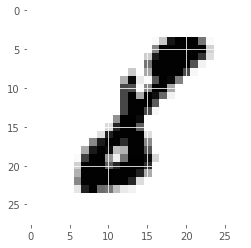

In [0]:
# RESHAPE to 28 X 28 (Height, Width) which Kaggle has flattened in their file

train4Display = np.array(train_imagesKaggle).reshape(42000,28,28)
test4Display = np.array(test_imagesKaggle).reshape(28000,28,28)

z = 4056

print("train image")
print(train_labelsKaggle[z])
digit = train4Display[z]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print("test image")
digit = test4Display[z]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


# NORMALIZE / SCALE and Prep for CNN in terms of number dimensions expected

In [0]:
train_imagesKaggle = train4Display.reshape(42000,28,28,1)
test_imagesKaggle = test4Display.reshape(28000,28,28,1)

train_imagesKaggle = train_imagesKaggle.astype('float32') / 255
test_imagesKaggle = test_imagesKaggle.astype('float32') / 255
print("train_imagesKaggle ",train_imagesKaggle.shape)
print("test_imagesKaggle ", test_imagesKaggle.shape)
print("_"*50)

# ONE HOT ENCODER for the labels
train_labelsKaggle = to_categorical(train_labelsKaggle)
print("train_labelsKaggle ",train_labelsKaggle.shape)

train_imagesKaggle  (42000, 28, 28, 1)
test_imagesKaggle  (28000, 28, 28, 1)
__________________________________________________
train_labelsKaggle  (42000, 10)


In [0]:
# Load Data from Keras MNIST

(train_imagesRaw, train_labelsRaw), (test_imagesRaw, test_labelsRaw) = mnist.load_data()

In [0]:
# Normalize / Scale and One Hot encoder for the Keras dataset & Reshape for CNN

train_imagesKeras = train_imagesRaw.copy()
train_labelsKeras = train_labelsRaw.copy()
test_imagesKeras = test_imagesRaw.copy()
test_labelsKeras = test_labelsRaw.copy()

train_imagesKeras = train_imagesKeras.reshape(60000,28,28,1)
test_imagesKeras = test_imagesKeras.reshape(10000,28,28,1)

print("train_imagesKeras ",train_imagesKeras.shape)
print("train_labelsKeras ",train_labelsKeras.shape)
print("test_imagesKeras ", test_imagesKeras.shape)
print("test_labelsKeras ", test_labelsKeras.shape)

# NORMALIZE 0-255 to 0-1
train_imagesKeras = train_imagesKeras.astype('float32') / 255
test_imagesKeras = test_imagesKeras.astype('float32') / 255
print("_"*50)

# ONE HOT ENCODER for the labels
train_labelsKeras = to_categorical(train_labelsKeras)
test_labelsKeras = to_categorical(test_labelsKeras)
print("train_labelsKeras ",train_labelsKeras.shape)
print("test_labelsKeras ", test_labelsKeras.shape)

train_imagesKeras  (60000, 28, 28, 1)
train_labelsKeras  (60000,)
test_imagesKeras  (10000, 28, 28, 1)
test_labelsKeras  (10000,)
__________________________________________________
train_labelsKeras  (60000, 10)
test_labelsKeras  (10000, 10)


# Concatenating Datasets

In [0]:
# CONCATENATE the training sets of Kaggle and Keras into final TRAIN and leave the test for CV

train_images = np.concatenate((train_imagesKeras,train_imagesKaggle), axis=0)
print("new Concatenated train_images ", train_images.shape)
print("_"*50)

train_labels = np.concatenate((train_labelsKeras,train_labelsKaggle), axis=0)
print("new Concatenated train_labels ", train_labels.shape)

new Concatenated train_images  (102000, 28, 28, 1)
__________________________________________________
new Concatenated train_labels  (102000, 10)


# Making the Model 

In [0]:
# Initial model
import keras
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

filepath="weights_best.hdf5" # checkpoint
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 12)        876       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          3488      
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0        

## -Total parameters = 7,926

# Fitting and Evaluating the model

In [0]:
# Initial fIT & Evaluate initial model

num_epochs = 150
BatchSize = 512

final_model=model.fit(train_images, train_labels, epochs=num_epochs, batch_size=BatchSize, validation_data=(test_imagesKeras, test_labelsKeras),callbacks=[checkpoint])
"""#test_loss, test_acc = model.evaluate(test_imagesKeras, test_labelsKeras)
print("_"*80)
print("Accuracy on test ", test_acc)"""

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 102000 samples, validate on 10000 samples
Epoch 1/150





102000/102000 [==============================] - 16s 152us/step - loss: 1.2806 - acc: 0.5593 - val_loss: 0.4362 - val_acc: 0.8671

Epoch 00001: val_acc improved from -inf to 0.86710, saving model to weights_best.hdf5
Epoch 2/150
102000/102000 [==============================] - 2s 15us/step - loss: 0.3966 - acc: 0.8737 - val_loss: 0.2233 - val_acc: 0.9293

Epoch 00002: val_acc improved from 0.86710 to 0.92930, saving model to weights_best.hdf5
Epoch 3/150
102000/102000 [==============================] - 1s 15us/step - loss: 0.2636 - acc: 0.9165 - val_loss: 0.1558 - val_acc: 0.9526

Epoch 00003: val_acc improved from 0.92930 to 0.95260, saving model to weights_best.hdf5
Epoch 4/150
102000/102000 [==============================] - 1s 15us/step - loss: 0.2094 - acc: 0.9338 - val_loss: 0.1260 - val_acc: 0.9612

Epoch 00004: val_

'#test_loss, test_acc = model.evaluate(test_imagesKeras, test_labelsKeras)\nprint("_"*80)\nprint("Accuracy on test ", test_acc)'

# Result - We achieved accuracy greater than 99.4% with only 7926 number of parameters.

# Plotting the accuracy vs loss,epoch graphs

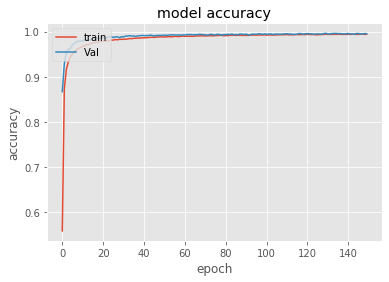

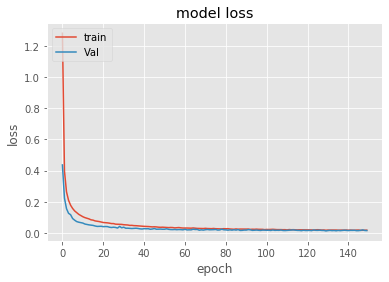

In [0]:
plt.plot(final_model.history['acc'])
plt.plot(final_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
